In [1]:
import numpy as np
import pandas as pd
data = pd.read_csv('Height_Weight_Gender - Dataset.csv',header=0,names=['Height','Weight','Gender'])

cleaning

In [2]:
data['Gender'].unique()

array(['Male', 'male', 'Female', 'junk', 'Mamale', 'Alien ', 'Malae', nan,
       'Femamal', 'Robo', 'not sure'], dtype=object)

In [3]:
data['Gender'] = data['Gender'].str.lower()

In [4]:
data = data[data['Gender'].isin(['male','female'])]

In [5]:
data['Height'] = pd.to_numeric(data['Height'])

In [6]:
data['Weight'] = pd.to_numeric(data['Weight'],errors='coerce')

In [7]:
data = data.dropna()

knn classifier

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

training_data, testing_data = train_test_split(data,test_size=0.3)
training_data = training_data.values
testing_data = testing_data.values
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3,metric='euclidean',algorithm='brute')

In [9]:
neigh.fit(training_data[:,:2],training_data[:,2])

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [10]:
pred = neigh.predict(testing_data[:,:2])

In [11]:
print(pred[:10], 'predictions')
print(testing_data[:10,2], 'labels')

['male' 'male' 'male' 'male' 'male' 'male' 'male' 'male' 'female' 'male'] predictions
['male' 'male' 'female' 'male' 'female' 'female' 'male' 'male' 'female'
 'male'] labels


linear classifier

In [12]:
from sklearn import linear_model

training_data, testing_data = train_test_split(data,test_size=0.3)
training_data = training_data.values
testing_data = testing_data.values
linear_classifier = linear_model.SGDClassifier()
linear_classifier.fit(training_data[:,:2],training_data[:,2])

c:\users\batman\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [13]:
linear_classifier.predict(testing_data[:,:2])

array(['male', 'male', 'male', 'male', 'male', 'male', 'male', 'male',
       'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male',
       'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male',
       'male', 'male', 'male', 'male'], dtype='<U6')

In [14]:
linear_classifier.score(testing_data[:,:2],testing_data[:,2])

0.7857142857142857

decission tree

In [15]:
import matplotlib.pyplot as plt
plt.plot(data[data['Gender'] == 'male']['Height'], data[data['Gender'] == 'male']['Weight'], 'r.')
plt.plot(data[data['Gender'] == 'female']['Height'], data[data['Gender'] == 'female']['Weight'], 'g.')
plt.xlabel("Height cms")
plt.ylabel("Weight kgs")
plt.show()

<Figure size 640x480 with 1 Axes>

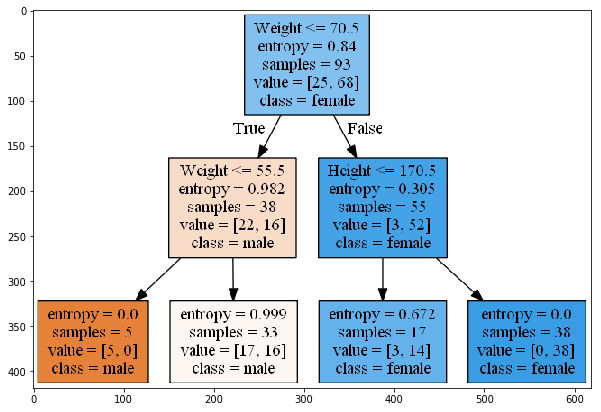

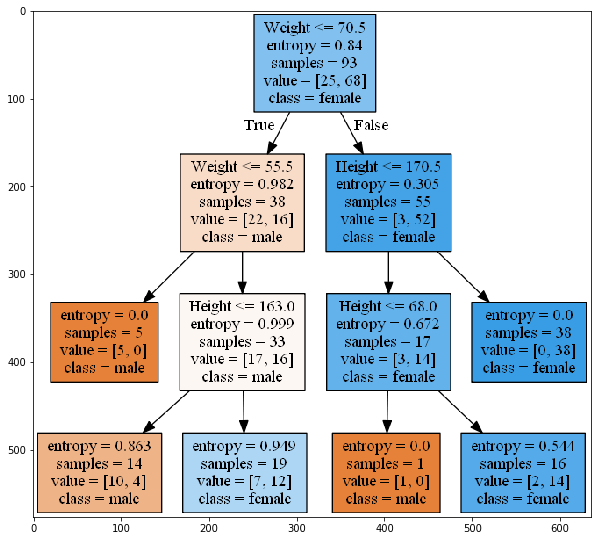

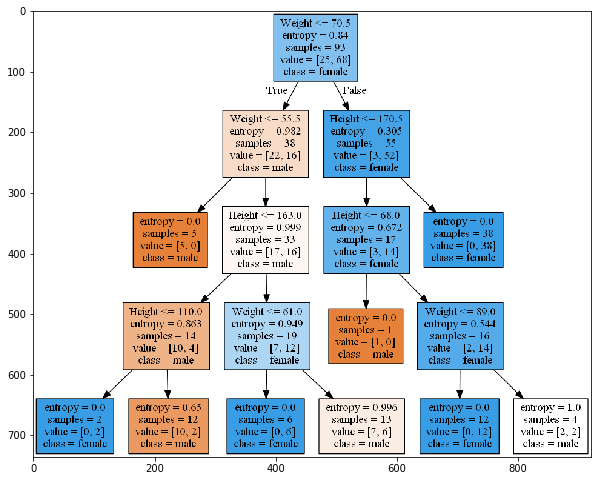

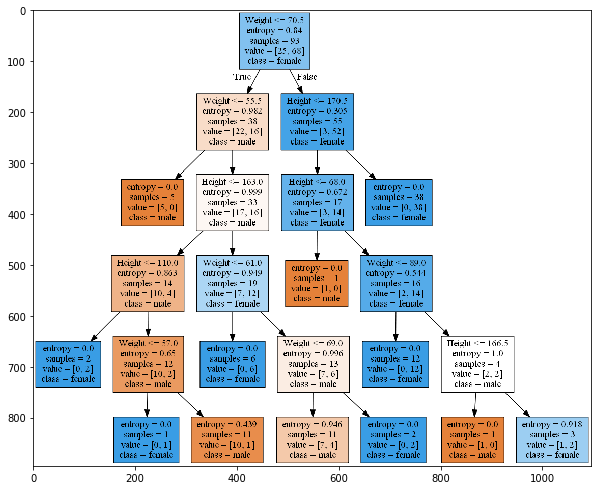

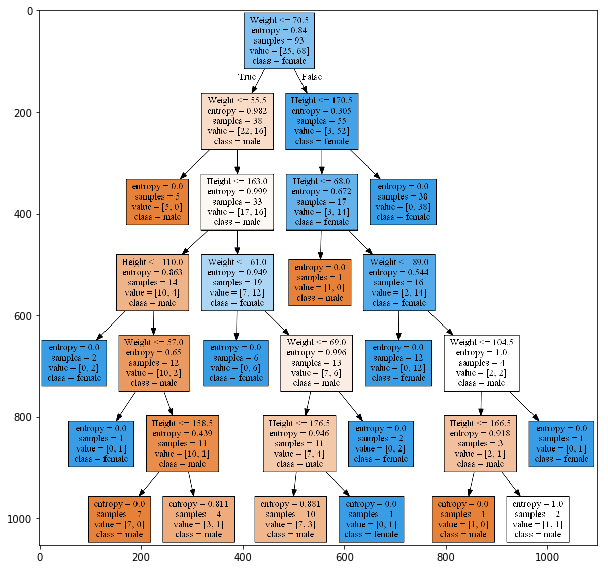

In [16]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
import os

for depth in range(2, 7):
    clf = DecisionTreeClassifier(max_depth = depth,criterion='entropy')
    # Fitting the data
    clf.fit(data[['Height','Weight']], data['Gender'])
    saveAs = "data_" + str(depth)
    save_dot = saveAs + ".dot"
    save_png = saveAs + ".png"
    # Exporting the model into a dot file
    graph = graphviz.Source(export_graphviz(clf, out_file=save_dot
       , feature_names=['Height','Weight'], class_names=['male','female'] 
       , filled = True))
    os.system('"C:\Program Files (x86)\Graphviz2.38\\bin\dot.exe" -Tpng ' + save_dot + ' > ' + save_png)
    dim = (10,10) if depth is 2 else ((15,15) if depth is 3 else (20,20))
    plt.figure(figsize=(10,10))
    plt.imshow(plt.imread(save_png))
    plt.grid(False)